In [0]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the coefficient
of determination are also calculated.


Automatically created module for IPython interactive environment
Coefficients: 
 [[1.08381404]]
Mean squared error: 68.46
Coefficient of determination: 0.94


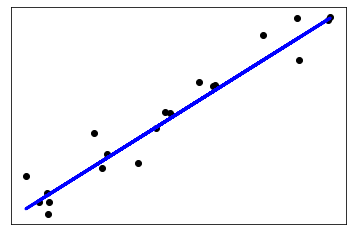

In [44]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
from random import random

# Generate my own dataset.
# The dataset consists of 100 data pairs (x,y). 
# The x-values are real numbers between 0 and 100. 
# The corresponding y-values have been generated using the function 
# ppf(random(), x, 10). (ppf is the percent point function 
# --the inverse of the normal CDF).
# Consequently, the best estimate for y should be x. 
ds_X = 100*np.random.rand(100,1)

ds_y = np.zeros((100,1))
for i in range(100):
  pp=norm.ppf(random(), loc=ds_X[i], scale=10)
  ds_y[i] = pp[0]

#print(ds_X)
#print(ds_Y)

# Split the data into training/testing sets
ds_X_train = ds_X[:-20]
ds_X_test = ds_X[-20:]

# Split the targets into training/testing sets
ds_y_train = ds_y[:-20]
ds_y_test = ds_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(ds_X_train, ds_y_train)

# Make predictions using the testing set
ds_y_pred = regr.predict(ds_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ds_y_test, ds_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ds_y_test, ds_y_pred))

# Plot outputs
plt.scatter(ds_X_test, ds_y_test,  color='black')
plt.plot(ds_X_test, ds_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()